## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [34]:
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [35]:
train, test = tf.keras.datasets.cifar10.load_data()

In [36]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tf.keras.utils.to_categorical(y, num_classes)
    return y   

In [37]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [38]:
x_train.shape

(50000, 3072)

In [39]:
def build_mlp(input_shape, output_units=10, num_neurons=[512,256, 256, 128,128]):
    input_layer = tf.keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tf.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = tf.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = tf.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = tf.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model=build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total para

In [40]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [42]:
optimizer = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [43]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
50000/50000 [==============================] - 17s 334us/sample - loss: 1.9144 - acc: 0.3012 - val_loss: 1.8045 - val_acc: 0.3363
Epoch 2/100
50000/50000 [==============================] - 19s 373us/sample - loss: 1.7155 - acc: 0.3830 - val_loss: 1.6343 - val_acc: 0.4145
Epoch 3/100
50000/50000 [==============================] - 23s 454us/sample - loss: 1.6167 - acc: 0.4193 - val_loss: 1.5639 - val_acc: 0.4354
Epoch 4/100
50000/50000 [==============================] - 21s 412us/sample - loss: 1.5549 - acc: 0.4427 - val_loss: 1.5680 - val_acc: 0.4372
Epoch 5/100
50000/50000 [==============================] - 20s 401us/sample - loss: 1.5064 - acc: 0.4593 - val_loss: 1.5319 - val_acc: 0.4604
Epoch 6/100
50000/50000 [==============================] - 20s 393us/sample - loss: 1.4624 - acc: 0.4774 - val_loss: 1.4852 - val_acc: 0.4712
Epoch 7/100
50000/50000 [=========================

50000/50000 [==============================] - 16s 323us/sample - loss: 0.4455 - acc: 0.8379 - val_loss: 2.5134 - val_acc: 0.5055
Epoch 57/100
50000/50000 [==============================] - 16s 320us/sample - loss: 0.3989 - acc: 0.8564 - val_loss: 2.6000 - val_acc: 0.5015
Epoch 58/100
50000/50000 [==============================] - 16s 322us/sample - loss: 0.3978 - acc: 0.8553 - val_loss: 2.6592 - val_acc: 0.5017
Epoch 59/100
50000/50000 [==============================] - 16s 321us/sample - loss: 0.4137 - acc: 0.8485 - val_loss: 2.6070 - val_acc: 0.5009
Epoch 60/100
50000/50000 [==============================] - 16s 322us/sample - loss: 0.4018 - acc: 0.8549 - val_loss: 2.6541 - val_acc: 0.4936
Epoch 61/100
50000/50000 [==============================] - 16s 321us/sample - loss: 0.3752 - acc: 0.8650 - val_loss: 2.6772 - val_acc: 0.4987
Epoch 62/100
50000/50000 [==============================] - 16s 321us/sample - loss: 0.3563 - acc: 0.8707 - val_loss: 2.7254 - val_acc: 0.5004
Epoch 63/100

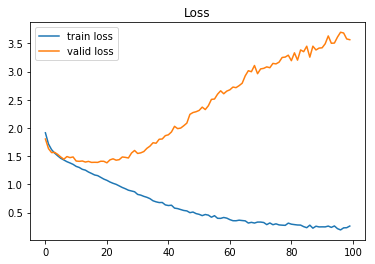

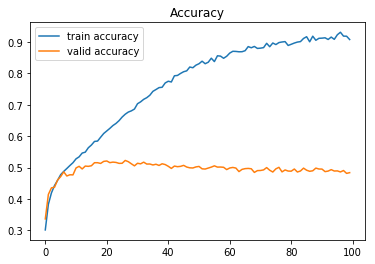

In [45]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()